In [1]:
from math import *
import numpy as np
import numpy.linalg as linalg

In [2]:
states = [
[0,0,1,1,0,0],
[0,0,0,1,0,1],
[0,0,1,0,1,0],
[0,0,1,0,0,1],
[0,0,0,1,1,0],
[0,0,0,0,1,1],

[0,1,1,1,0,0],
[0,1,0,1,0,1],
[0,1,1,0,1,0],
[0,1,1,0,0,1],
[0,1,0,1,1,0],
[0,1,0,0,1,1],

[1,0,1,1,0,0], 
[1,0,0,1,0,1],
[1,0,1,0,1,0],
[1,0,1,0,0,1],
[1,0,0,1,1,0],
[1,0,0,0,1,1],

[1,1,1,1,0,0], 
[1,1,0,1,0,1],
[1,1,1,0,1,0],
[1,1,1,0,0,1],
[1,1,0,1,1,0],
[1,1,0,0,1,1]
]

In [3]:
# Constants

G = 0.01
H = 1
HW = 10

In [4]:
def eigensolver(H):
    e, v = linalg.eig(H)
    idx = e.argsort()[::1]   
    e = e[idx]
    v = v[:,idx]
    return e, v

In [5]:
def get_Hij(i, j):
  if (i == j):
    return (states[i][0] + states[i][1] + states[i][4] + states[i][5]) * HW

  if (states[i][3] == states[j][3] and states[i][5] == states[j][5] and states[i][1] == states[j][1]):

    if (states[i][2] - states[j][2] == 1 and states[j][4] - states[i][4] == 1 and states[i][0] - states[j][0] == 1):
      return sqrt(max(states[i][0], states[j][0])) * G
 
    if (states[i][2] - states[j][2] == -1 and states[j][4] - states[i][4] == -1 and states[i][0] - states[j][0] == -1):
      return sqrt(max(states[i][0], states[j][0])) * G

  elif (states[i][2] == states[j][2] and states[i][4] == states[j][4] and states[i][0] == states[j][0]):

    if (states[i][3] - states[j][3] == 1 and states[j][5] - states[i][5] == 1 and states[i][1] - states[j][1] == 1):
      return sqrt(max(states[i][1], states[j][1])) * G
 
    if (states[i][3] - states[j][3] == -1 and states[j][5] - states[i][5] == -1 and states[i][1] - states[j][1] == -1):
      return sqrt(max(states[i][1], states[j][1])) * G
 
  return 0

In [6]:
H = np.zeros((24,24))

for i in range(24):
  for j in range(24):
    H[i, j] = get_Hij(i,j)

#print(H)

E, v = eigensolver(H)
print('Energies:')
print(E)
print('Vectors (column-wise):')
#print(v)

Energies:
[ 0.    9.99  9.99 10.   10.   10.01 10.01 19.98 20.   20.   20.   20.
 20.   20.   20.   20.   20.02 29.99 29.99 30.   30.   30.01 30.01 40.  ]
Vectors (column-wise):


In [7]:
def calc_lambda(b, v):
    psi_0 = np.array(b)
    lam = linalg.solve(v, psi_0)
    return lam

def psi_t(t, basis_dim, lam, E, C):
    
    psi = np.zeros((basis_dim), dtype=np.cdouble)
    
    for alpha in range(0,basis_dim):
        coef_nm_re = 0.0
        coef_nm_im = 0.0
        for j in range(0,basis_dim):
            coef_nm_re += lam[j] * C[alpha,j] * cos(E[j]*t)
            coef_nm_im += - lam[j] * C[alpha,j] * sin(E[j]*t)
        psi[alpha] = coef_nm_re + coef_nm_im * 1j

    return psi

b = np.zeros(24)
b[4] = + 1.0 / 2.0
b[0] = - 1.0 / 2.0
b[5] = + 1.0 / 2.0
b[3] = - 1.0 / 2.0

b_test1 = np.zeros(24)
b_test1[0] = 1

b_test2 = np.zeros(24)
b_test2[3] = 1

lam = calc_lambda(b, v)
lam_test1 = calc_lambda(b_test1, v)
lam_test2 = calc_lambda(b_test2, v)

# волновая функция в начальный момент времени - для проверки
print(psi_t(0, 24, lam, E, v))

[-5.00000000e-01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
 -5.00000000e-01+0.j  5.00000000e-01+0.j  5.00000000e-01+0.j
  5.55111512e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j  4.00340656e-35+0.j  0.00000000e+00+0.j
 -5.55111512e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
 -4.00340656e-35+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  2.00168212e-54+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
  0.00000000e+00+0.j -1.23259516e-32+0.j  0.00000000e+00+0.j]


In [8]:
def prob(z):
  return abs((z * z.conjugate()).real)

#solution

In [9]:
t = np.linspace(0, 1000, 100000)

#psi_old = psi_t(0, 24, lam, E, v)

psi = np.zeros(24, dtype=np.cdouble)

psi[4] = + 1.0 / 2.0 + 0.j
psi[0] = - 1.0 / 2.0 + 0.j
psi[5] = + 1.0 / 2.0 + 0.j
psi[3] = - 1.0 / 2.0 + 0.j

result = []

for ti in t:
  psi = psi_t(ti, 24, lam, E, v)
  result.append(prob(psi[0]) + prob(psi[6]) + prob(psi[12]) + prob(psi[18]))

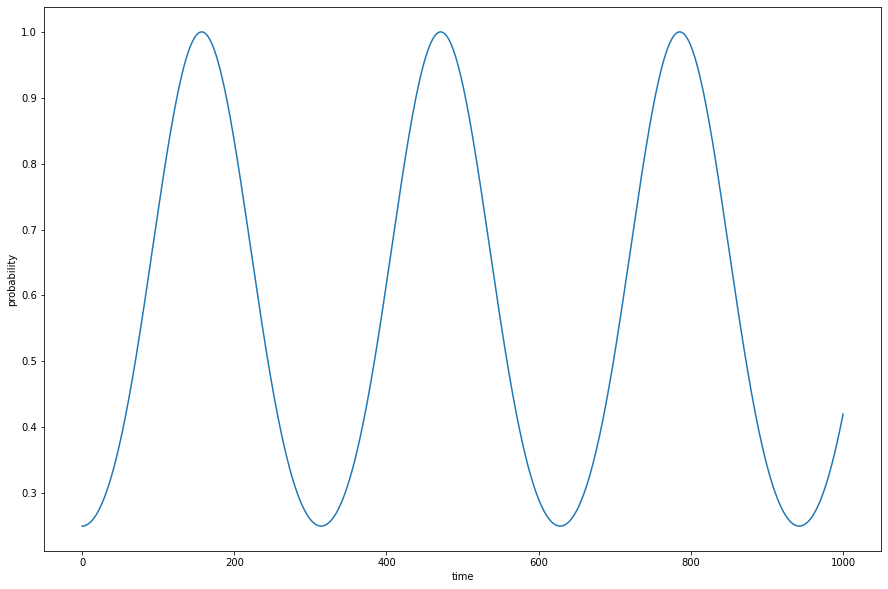

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(t, result)
plt.xlabel('time')
plt.ylabel('probability')
plt.show()

#test1


In [11]:
t = np.linspace(0, 1000, 100000)

psi = np.zeros(24, dtype=np.cdouble)

psi[0] = 1

result = []

for ti in t:
  psi = psi_t(ti, 24, lam_test1, E, v)
  result.append(prob(psi[0]) + prob(psi[6]) + prob(psi[12]) + prob(psi[18]))

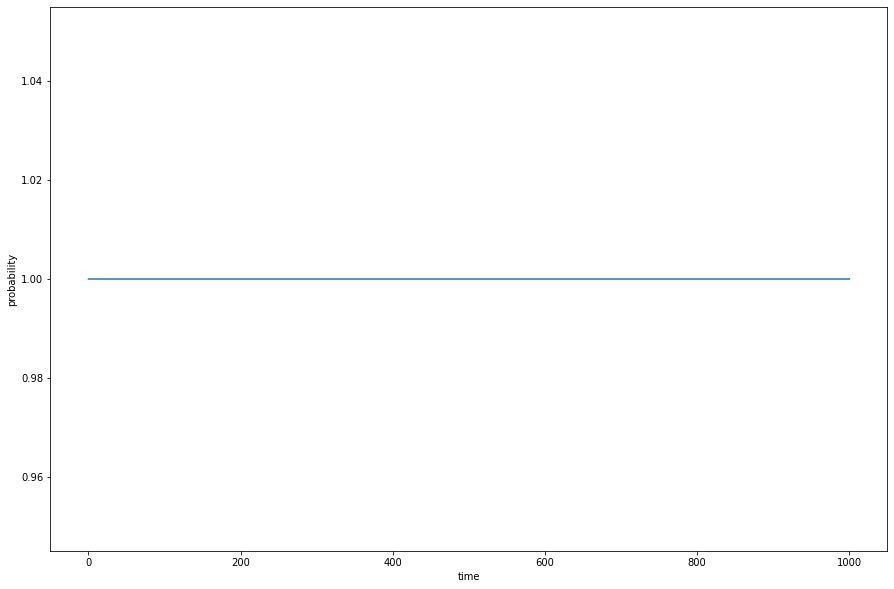

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(t, result)
plt.xlabel('time')
plt.ylabel('probability')
plt.show()

#test2

In [13]:
t = np.linspace(0, 1000, 100000)

psi = np.zeros(24, dtype=np.cdouble)

psi[3] = 1

result = []

for ti in t:
  psi = psi_t(ti, 24, lam_test2, E, v)
  result.append(prob(psi[0]) + prob(psi[6]) + prob(psi[12]) + prob(psi[18]))

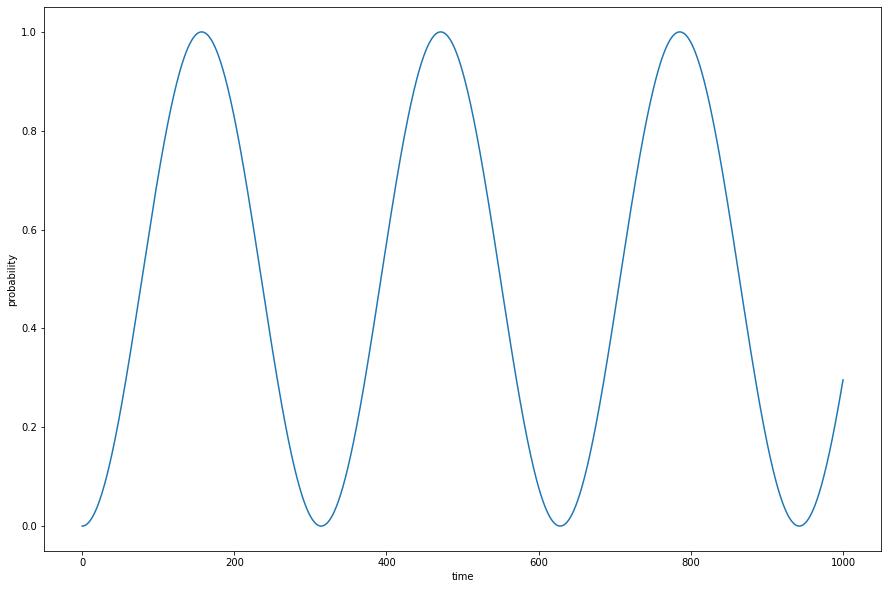

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(t, result)
plt.xlabel('time')
plt.ylabel('probability')
plt.show()

# numerical soluction

In [24]:
psi_old = np.zeros(24, dtype=np.cdouble)
psi_new = np.zeros(24, dtype=np.cdouble)

psi_old[0] = - 1.0 / 2.0
psi_old[3] = - 1.0 / 2.0
psi_old[4] = + 1.0 / 2.0
psi_old[5] = + 1.0 / 2.0

t = np.linspace(0, 1000, 100000)

max_iters = 100000
max_time = 1000
time_step = max_iters / max_time

result = []

for ti in t:
  sum = 0.0 + 0.j
  for i in range(24):
    psi_new[i] = 0
    for j in range(24):
      psi_new[i] += ((i==j) - 1j * get_Hij(i,j) * time_step) * psi_old[j]
    sum = sum + psi_new[i] * psi_new[i].conjugate()
  
  result.append(prob(psi_old[0]) + prob(psi_old[6]) + prob(psi_old[12]) + prob(psi_old[18]))

  for i in range(24):
    psi_old[i] = psi_new[i] / sum

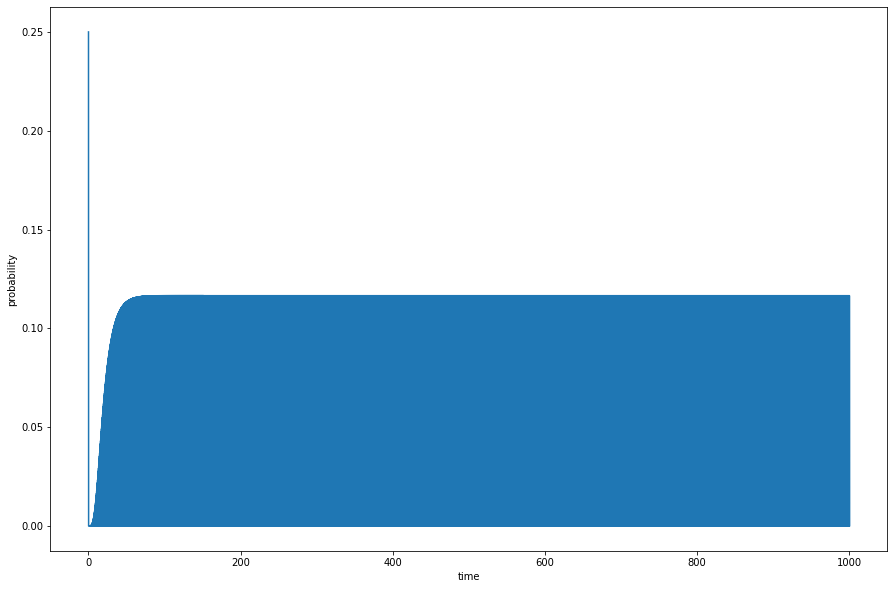

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(t, result)
plt.xlabel('time')
plt.ylabel('probability')
plt.show()